<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
جرم‌شناسی
</font>
</h1>




<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هدف شما در این مسئله، ایجاد یک مدل پیش‌بینی است که می‌تواند از داده‌های تاریخی حوادث جدید را در یکی از چندین دسته جرم طبقه‌بندی کند. این مدل باید به سازمان‌های مجری قانون کمک کند تا الگوهای رفتار مجرمانه را شناسایی کرده و تصمیمات آگاهانه‌تری در مورد استراتژی‌های پیشگیری از جرم در لس‌آنجلس بگیرند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه داده آموزشی شامل 84113 سطر است که در جدول زیر، توضیحات هر ستون آمده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|DR_NO| یک شناسه‌ی منحصر به فرد برای هر گزارش جرم|
|Date Rptd| تاریخ گزارش جنایت|
|DATE OCC| تاریخ وقوع جرم|
|TIME OCC| زمان وقوع جرم|
|AREA| کد منطقه‌ای که جرم در آن رخ داده است|
|AREA NAME| نام منطقه‌ای که جرم در آن رخ داده است|
|Rpt Dist No| شماره‌ی منطقه‌ی گزارش‌دهنده|
|Crm Cd| کد جرم که نشان‌دهنده‌ی دسته‌ی جرم است (این ستون، متغیر هدف است)|
|Crm Cd Desc| شرح جرم|
|Mocodes| کدهای نشان‌دهنده‌ی روش مورد استفاده برای ارتکاب جرم|
|Vict Age| سن قربانی|
|Vict Sex| جنسیت قربانی|
|Vict Descent| قومیت/تبار قربانی|
|Premis Cd| کد نوع محل وقوع جرم|
|Premis Desc| شرحی از محل|
|Weapon Used Cd| کد نوع سلاح مورد استفاده در جرم|
|Weapon Desc| شرحی از سلاح مورد استفاده|
|Status| وضعیت پرونده (به عنوان مثال، در دست بررسی، بسته‌شده)|
|Status Desc| شرح وضعیت پرونده|
|Crm Cd 1، Crm Cd 2، Crm Cd 3، Crm Cd 4| کدهای جرم اضافی در صورتی که حادثه شامل چندین جرم باشد|
|LOCATION| طول و عرض جغرافیایی جنایت|
|Cross Street| نزدیکترین چهارراه به محل وقوع جرم|
|LAT| مختصات عرض جغرافیایی جرم|
|LON| مختصات طول جغرافیایی جرم|

    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مجموعه‌داده‌ی آزمایش نیز مانند مجموعه‌ی آموزش است با این تفاوت که ستون <code>Crm Cd</code> که متغیر هدف مسئله است را در خود ندارد. همچنین ستون‌های <code>Crm Cd 1</code> و <code>Crm Cd 2</code> و  <code>Crm Cd 3</code> و <code>Crm Cd 4</code> و <code>Crm Cd Desc</code> که اطلاعات مستقیم در مورد متغیر هدف دارند را نیز در خود ندارد. مجموعه‌داده‌ی آزمایش 9346 سطر و 21 ستون دارد.
</font>
</p>


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [25]:
import pandas as pd

df = pd.read_csv('train.csv')
X_test= pd.read_csv('train.csv')

print(df.isnull().sum())
print("="*50)

print("missing_columns = ",df.columns[df.isnull().any()].tolist())

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Crm Cd                0
Crm Cd Desc           0
Mocodes           13745
Vict Age              0
Vict Sex          13524
Vict Descent      13525
Premis Cd             2
Premis Desc          31
Weapon Used Cd    54392
Weapon Desc       54392
Status                0
Status Desc           0
Crm Cd 1              2
Crm Cd 2          78828
Crm Cd 3          84026
Crm Cd 4          84110
LOCATION              0
Cross Street      68909
LAT                   0
LON                   0
dtype: int64
missing_columns =  ['Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']


In [27]:
# Split Data
X = df.drop(columns=["Crm Cd"]) #target columns
y = df["Crm Cd"] #target columns
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_val), len(X_test))

67290 16823 84113


In [29]:
# 1. Remove unnecessary columns
# Columns related to the target variable and identifiers

columns_to_drop = [
    'DR_NO', 
    'Crm Cd Desc', 
    'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', # Columns related to the target variable and identifiers
    'LOCATION', 'Cross Street', # LAT/LON
    'Weapon Used Cd', 'Weapon Desc',  # null value > 50 %
    'Mocodes'  # null value
]

X_train.drop(columns=["DR_NO",
                      "AREA NAME", "Status Desc", "Weapon Desc", "Premis Desc",
                      "Crm Cd Desc", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"], # Columns related to the target variable and identifiers
             inplace=True)

X_val.drop(columns=["DR_NO",
                    "AREA NAME", "Status Desc", "Weapon Desc", "Premis Desc",
                    "Crm Cd Desc", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"], # Columns related to the target variable and identifiers
           inplace=True)

X_test.drop(columns=["DR_NO",
                     "AREA NAME", "Status Desc", "Weapon Desc", "Premis Desc"],
            inplace=True)
X_train

# 2. Managing null values
# For numerical columns: fill with the median
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum()>0:
        median_value = df[col].median()
        df[col].fillna(median_value)
        
# For categorical columns: fill with mode or 'Unknown'
category_cols = df.select_dtypes(include=['object']).columns
for col in category_cols:
    if df[col].isnull().sum()>0:
        if df[col].isnull().mean() > 0.3:
            df[col].fillna('Unkown')
        else:
            mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
            df[col] = df[col].fillna(mode_val) 
            
print("\nNull values after handeling:")
print(df.isnull().sum())

# 3. Handling Invalid Values
# Vict Age: replace negative values and 99 with the median
median_age = df['Vict Age'].median()
df['Vict Age'] = df['Vict Age'].apply(lambda x: median_age if x < 0 or x == 99 else x)

# LAT and LON: We will remove values outside the valid range for Los Angeles
# Approximate range for Los Angeles: LAT: 33.5 to 34.5, LON: -119 to -118
valid_lat_mask = (df['LAT'] >= 33.5) & (df['LAT'] <= 34.5)
valid_lon_mask = (df['LON'] >= -119) & (df['LON'] <= -118)
df = df[valid_lat_mask & valid_lon_mask].copy()

print("\nAfter handling invalid values:", df.shape)

# 4. تبدیل تاریخ و زمان
print("تبدیل تاریخ و زمان...")

# تبدیل ستون‌های تاریخ به فرمت datetime با فرمت مشخص
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# بررسی اینکه آیا تبدیل موفقیت‌آمیز بوده است
print(f"تعداد مقادیر null در Date Rptd بعد از تبدیل: {df['Date Rptd'].isnull().sum()}")
print(f"تعداد مقادیر null در DATE OCC بعد از تبدیل: {df['DATE OCC'].isnull().sum()}")

# استخراج ویژگی‌های جدید از تاریخ
df['Occurrence_Year'] = df['DATE OCC'].dt.year
df['Occurrence_Month'] = df['DATE OCC'].dt.month
df['Occurrence_Day'] = df['DATE OCC'].dt.day
df['Occurrence_DayOfWeek'] = df['DATE OCC'].dt.dayofweek
df['Occurrence_IsWeekend'] = df['Occurrence_DayOfWeek'].isin([5, 6]).astype(int)

# تبدیل زمان به فرمت مناسب و استخراج ساعت
def convert_time_occ(time_val):
    try:
        time_str = str(int(time_val)).zfill(4)
        return f"{time_str[:2]}:{time_str[2:]}"
    except (ValueError, TypeError):
        return "00:00"

df['TIME OCC'] = df['TIME OCC'].apply(convert_time_occ)

# استخراج ساعت به روش بهینه‌تر
def extract_hour(time_str):
    try:
        return int(time_str.split(':')[0])
    except (AttributeError, ValueError, IndexError):
        return 0

df['Occurrence_Hour'] = df['TIME OCC'].apply(extract_hour)

# ایجاد بازه‌های زمانی
def time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_Period'] = df['Occurrence_Hour'].apply(time_period)

# نمایش اطلاعات جدید
print("\nاطلاعات جدید اضافه شده:")
print(f"سال‌های موجود: {sorted(df['Occurrence_Year'].unique())}")
print(f"توزیع ساعات: {df['Occurrence_Hour'].value_counts().head()}")
print(f"توزیع بازه‌های زمانی: {df['Time_Period'].value_counts()}")

# حذف ستون‌های موقت اگر لازم است
# df.drop(columns=['TIME OCC'], inplace=True)  # اگر دیگر نیاز نیست


# 5. کدگذاری متغیرهای دسته‌ای
# Label Encoding برای ستون‌های دسته‌ای با تعداد کمی مقدار منحصربه‌فرد
label_encoders = {}
categorical_cols = ['Vict Sex', 'Vict Descent', 'Status', 'Status Desc', 'AREA NAME', 'Time_Period']

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        # ترکیب مقادیر نادرست با 'Other' قبل از encoding
        value_counts = df[col].value_counts()
        values_to_keep = value_counts[value_counts > 10].index
        df[col] = df[col].apply(lambda x: x if x in values_to_keep else 'Other')
        
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# One-Hot Encoding برای ستون‌های با مقادیر منحصربه‌فرد بیشتر
# برای مثال Premis Desc که مقادیر منحصربه‌فرد زیادی دارد
premis_value_counts = df['Premis Desc'].value_counts()
# فقط مقادیری که بیش از 50 بار تکرار شده‌اند را نگه می‌داریم
values_to_keep = premis_value_counts[premis_value_counts > 50].index
df['Premis Desc'] = df['Premis Desc'].apply(lambda x: x if x in values_to_keep else 'Other')



# انجام One-Hot Encoding
premis_dummies = pd.get_dummies(df['Premis Desc'], prefix='Premis')
df = pd.concat([df, premis_dummies], axis=1)
df.drop(columns=['Premis Desc'], inplace=True)

# حذف ستون‌های تاریخ و زمان اصلی که دیگر نیاز نیستند
df.drop(columns=['Date Rptd', 'DATE OCC', 'TIME OCC'], inplace=True)

# نمایش اطلاعات نهایی
print("\nFinal shape:", df.shape)
# print("\nFinal columns:")
# print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())

# ذخیره dataset پاک‌سازی شده
df.to_csv('cleaned_crime_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_crime_data.csv'")


Null values after handeling:
DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Crm Cd                0
Crm Cd Desc           0
Mocodes               0
Vict Age              0
Vict Sex              0
Vict Descent          0
Premis Cd             2
Premis Desc           0
Weapon Used Cd    54392
Weapon Desc       54392
Status                0
Status Desc           0
Crm Cd 1              2
Crm Cd 2          78828
Crm Cd 3          84026
Crm Cd 4          84110
LOCATION              0
Cross Street      68909
LAT                   0
LON                   0
dtype: int64

After handling invalid values: (83918, 27)
تبدیل تاریخ و زمان...
تعداد مقادیر null در Date Rptd بعد از تبدیل: 0
تعداد مقادیر null در DATE OCC بعد از تبدیل: 0

اطلاعات جدید اضافه شده:
سال‌های موجود: [2020]
توزیع ساعات: Occurrence_Hour
12    5479
18    5297
17    5118
20    5063
19    4799
Name: count, dtype:

In [ ]:
mlb = MultiLabelBinarizer()

X_train['Mocodes'] = X_train['Mocodes'].astype('str').apply(lambda x: list(map(int, x.split())) if x != 'nan' else [])
X_val['Mocodes'] = X_val['Mocodes'].astype('str').apply(lambda x: list(map(int, x.split())) if x != 'nan' else [])
X_test['Mocodes'] = X_test['Mocodes'].astype('str').apply(lambda x: list(map(int, x.split())) if x != 'nan' else [])

X_train = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(mlb.fit_transform(X_train["Mocodes"]), columns=[f'Mocodes_{num}' for num in mlb.classes_])], axis=1)
X_val = pd.concat([X_val.reset_index(drop=True), pd.DataFrame(mlb.transform(X_val["Mocodes"]), columns=[f'Mocodes_{num}' for num in mlb.classes_])], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(mlb.transform(X_test["Mocodes"]), columns=[f'Mocodes_{num}' for num in mlb.classes_])], axis=1)
X_train

In [11]:
# 1. The relationship between the type of crime and the gender of the victim.
crossexample = pd.crosstab(df['Crm Cd Desc'], df['Vict Sex'])
print("relationship between the type of crime and the gender of the victim:")
print(crossexample)
print("-------------")

# 2. Average age of victims based on type of crime
age_by_crime = df.groupby('Crm Cd Desc')['Vict Age'].mean()
print("\nAverage age of victims based on type of crime:")
print(age_by_crime.sort_values(ascending=False).head(10))
print("-------------")

# 3. Examination of the Weapons Used in Various Crimes
weapon_by_crime = df.groupby(['Crm Cd Desc', 'Weapon Desc']).size()
print("\n Examination of the Weapons Used in Various Crimes:")
print(weapon_by_crime.head(10))


relationship between the type of crime and the gender of the victim:
Vict Sex                                               F  H     M     X
Crm Cd Desc                                                            
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT      1665  1  4416   104
BATTERY - SIMPLE ASSAULT                            4262  1  4526    39
BURGLARY                                            1765  0  3449  1569
BURGLARY FROM VEHICLE                               2951  2  3841   154
CRIMINAL THREATS - NO WEAPON DISPLAYED              1154  0  1106    37
INTIMATE PARTNER - SIMPLE ASSAULT                   4375  0  1372     8
ROBBERY                                              970  0  2324   477
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...   905  0  1517   141
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)     1174  0  1644    77
THEFT OF IDENTITY                                   2416  1  2590    48
THEFT PLAIN - PETTY ($950 & UNDER)                  2393  1  2789  

In [13]:
# 1. The most frequent crime occurrence areas
print("# 1. The most frequent crime occurrence areas:")
print("="*50)
print(df['AREA NAME'].value_counts().head(5))

print("="*50)
# 2. The relationship between the type of crime and the area
crime_by_area = pd.crosstab(df['Crm Cd Desc'], df['AREA NAME'])
print("\n The relationship between the type of crime and the area:")
print("="*50)
print(crime_by_area)


# 1. The most frequent crime occurrence areas:
AREA NAME
77th Street    5538
Central        4774
Pacific        4708
Southeast      4525
Southwest      4501
Name: count, dtype: int64

 The relationship between the type of crime and the area:
AREA NAME                                           77th Street  Central  \
Crm Cd Desc                                                                
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              818      433   
BATTERY - SIMPLE ASSAULT                                    524      741   
BURGLARY                                                    234      312   
BURGLARY FROM VEHICLE                                       280      646   
CRIMINAL THREATS - NO WEAPON DISPLAYED                      182      141   
INTIMATE PARTNER - SIMPLE ASSAULT                           568      250   
ROBBERY                                                     458      275   
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...           75       87  

تعداد ستون‌های عددی: 25
ستون‌های عددی: ['DR_NO', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON', 'Occurrence_Year', 'Occurrence_Month', 'Occurrence_Day', 'Occurrence_DayOfWeek', 'Occurrence_IsWeekend', 'Occurrence_Hour', 'Time_Period']

ماتریس همبستگی:
                  Crm Cd  Crm Cd 1  Weapon Used Cd  Crm Cd 4  Status Desc  \
Crm Cd          1.000000  0.999805        0.527669  0.500000    -0.114893   
Crm Cd 1        0.999805  1.000000        0.527728  0.500000    -0.114630   
Weapon Used Cd  0.527669  0.527728        1.000000 -1.000000    -0.030071   
Crm Cd 4        0.500000  0.500000       -1.000000  1.000000    -0.500000   
Status Desc    -0.114893 -0.114630       -0.030071 -0.500000     1.000000   
Status         -0.114893 -0.114630       -0.030071 -0.500000     1.000000   
Crm Cd 3        0.093033  0.091660       -0.056252 -

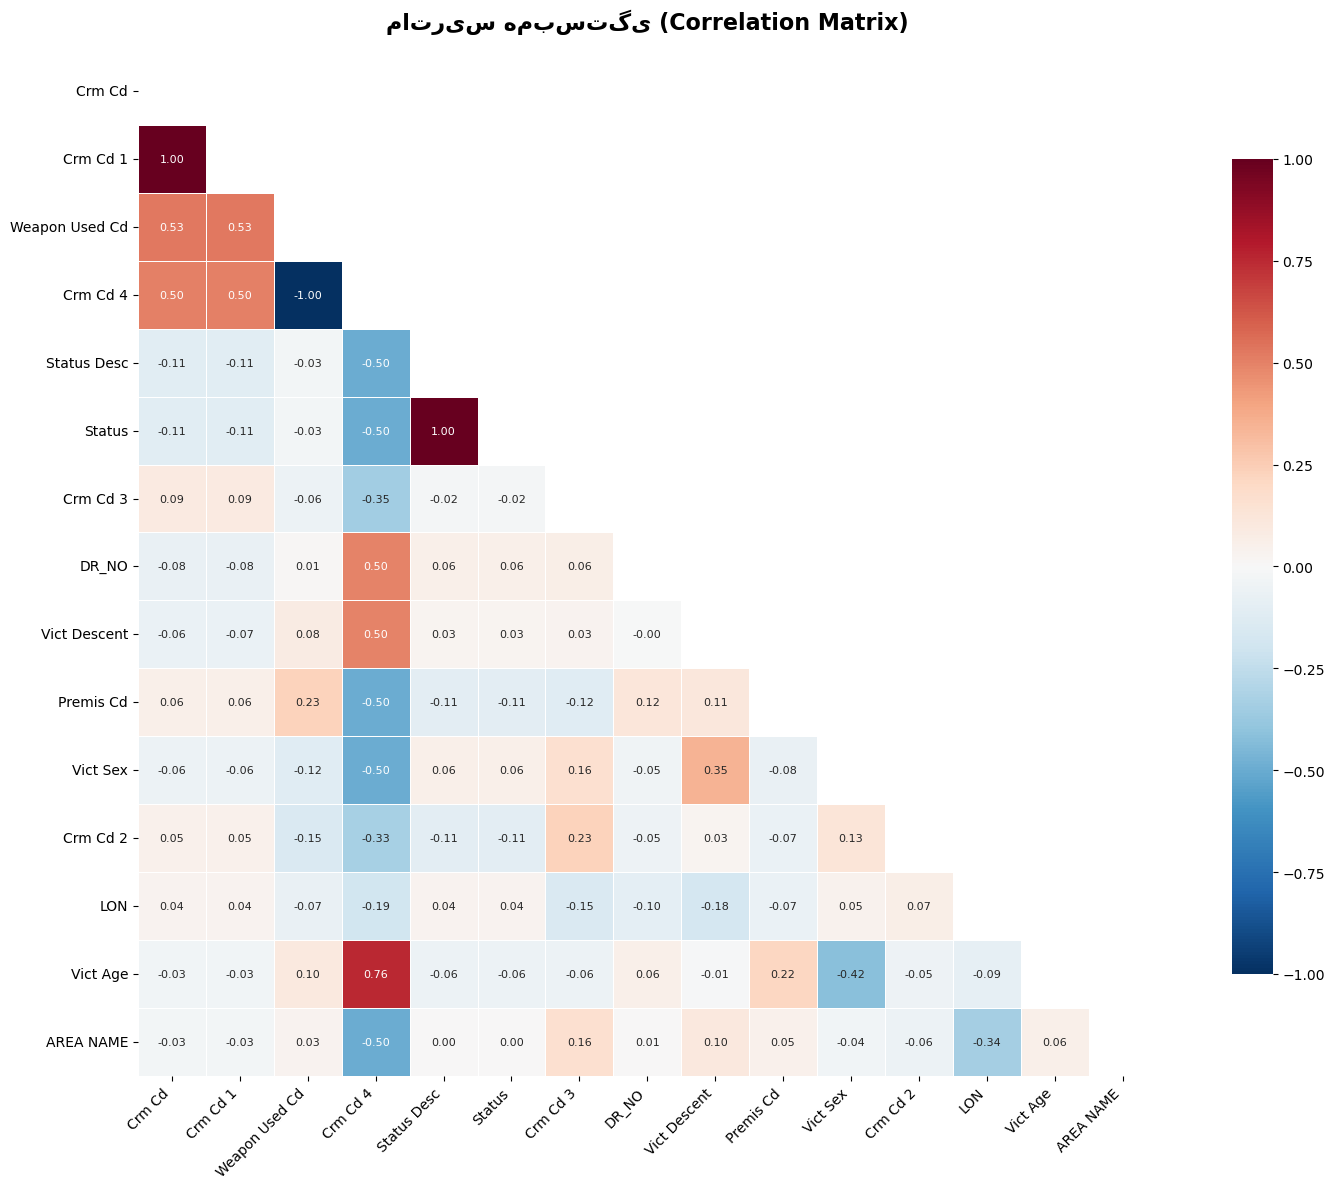


همبستگی‌های قوی (|correlation| > 0.7):
Crm Cd - Crm Cd 1: 1.000
Weapon Used Cd - Crm Cd 4: -1.000
Crm Cd 4 - Vict Age: 0.756
Status Desc - Status: 1.000

رسم نمودار scatter برای همبستگی‌های قوی...


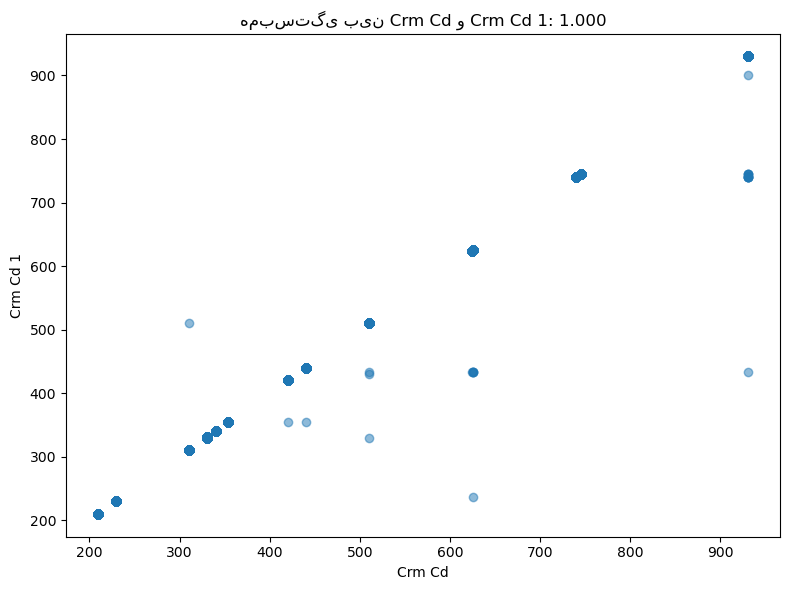

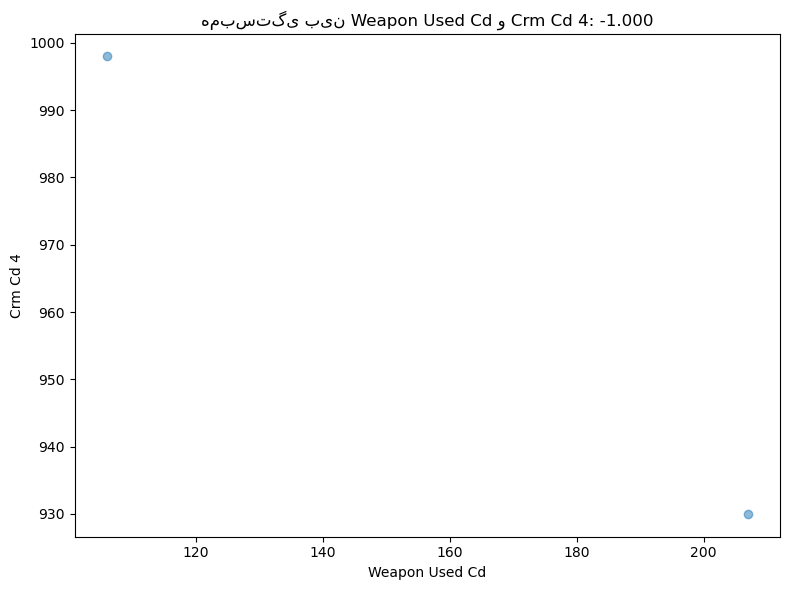

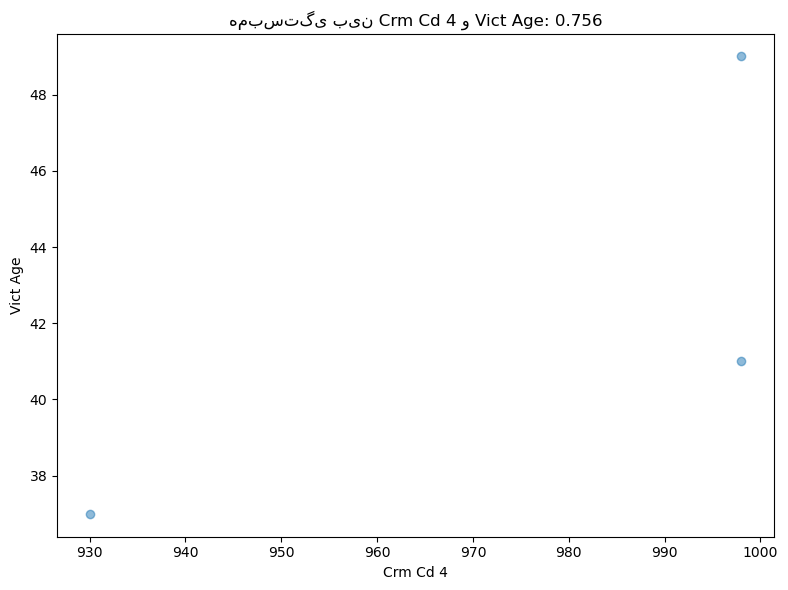

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# تنظیمات ظاهری نمودار
plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10

# ابتدا داده‌های عددی را انتخاب می‌کنیم
numeric_df = df.select_dtypes(include=[np.number])

print(f"تعداد ستون‌های عددی: {numeric_df.shape[1]}")
print("ستون‌های عددی:", numeric_df.columns.tolist())

# اگر ستون‌های عددی زیادی دارید، می‌توانید فقط برخی را انتخاب کنید
if numeric_df.shape[1] > 15:
    # محاسبه همبستگی با هدف (اگر ستون هدف دارید)
    # فرض می‌کنیم 'Crm Cd' ستون هدف است - اگر نام متفاوت است تغییر دهید
    target_col = 'Crm Cd' if 'Crm Cd' in numeric_df.columns else numeric_df.columns[0]
    
    # انتخاب ۱۵ ستون با بیشترین همبستگی با هدف
    correlations = numeric_df.corr()[target_col].abs().sort_values(ascending=False)
    top_columns = correlations.head(15).index.tolist()
    numeric_df = numeric_df[top_columns]

# محاسبه ماتریس همبستگی
correlation_matrix = numeric_df.corr()

print("\nماتریس همبستگی:")
print(correlation_matrix)

# رسم heatmap ماتریس همبستگی
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # مثلث بالا را mask می‌کند

heatmap = sns.heatmap(correlation_matrix, 
                      mask=mask,
                      annot=True, 
                      cmap='RdBu_r', 
                      center=0,
                      square=True, 
                      linewidths=0.5,
                      cbar_kws={"shrink": 0.8},
                      fmt='.2f',
                      annot_kws={'size': 8})

plt.title('ماتریس همبستگی (Correlation Matrix)', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# نمایش همبستگی‌های قوی (بالاتر از ۰.۷ یا پایین‌تر از -۰.۷)
print("\nهمبستگی‌های قوی (|correlation| > 0.7):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.7:
            strong_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr
            ))

if strong_correlations:
    for col1, col2, corr in strong_correlations:
        print(f"{col1} - {col2}: {corr:.3f}")
else:
    print("هیچ همبستگی قوی یافت نشد.")

# نمودار جفت‌ی برای همبستگی‌های قوی
if strong_correlations:
    print("\nرسم نمودار scatter برای همبستگی‌های قوی...")
    for col1, col2, corr in strong_correlations[:3]:  # فقط ۳ تا اول
        plt.figure(figsize=(8, 6))
        plt.scatter(numeric_df[col1], numeric_df[col2], alpha=0.5)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f'همبستگی بین {col1} و {col2}: {corr:.3f}')
        plt.tight_layout()
        plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
 معیار ارزیابی مورد استفاده در داوری این مسئله، امتیاز <code>F1 Macro</code> است که دقت و بازیابی را در تمام دسته‌های جرم به صورت متعادل‌شده بررسی می‌کند. بر خلاف دقت، که می تواند توسط داده‌های نامتعادل تغییر کند، امتیاز <code>F1 Macro</code>، امتیاز <code>F1</code> را برای هر دسته‌ی جرم به طور مستقل محاسبه می‌کند و سپس میانگین آن‌ها را محاسبه می‌کند. این معیار تضمین می‌کند که عملکرد در دسته‌های جرایم کم‌تکرار اهمیت یکسانی دارد. این ویژگی این معیار را برای پیش‌بینی انواع مختلف جرایم، صرف نظر از فراوانی آنها در مجموعه‌داده، مناسب می‌سازد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    از مدل خود برای پیش‌بینی نمونه‌های موجود در داده‌ی تست استفاده کنید و نتایج را در قالب جدولی (<code>dataframe</code>) به شکل زیر آماده کنید.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|------|---|
|Crm Cd|کد جرم پیش‌بینی‌شده|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل ۱ ستون با اسم <i>Crm Cd</i> است و ? سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، مقادیر ستون <i>Crm Cd</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: center;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|Crm Cd|
|-----|
|210|
|420|
|930|
|624|
|420|

</font>
</div>

In [ ]:
# predict test samples
submission =

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) در غیر این صورت، در پایان مسابقه نمره شما به صفر تغییر خواهد کرد.
    <br>
    همچنین اگر از کولب برای اجرای این فایل نوت‌بوک استفاده می‌کنید، قبل از ارسال فایل <code>result.zip</code>، آخرین نسخه‌ی نوت‌بوک خود را دانلود کرده و داخل فایل ارسالی قرار دهید.
</font>

In [ ]:
import zipfile
import joblib

if not os.path.exists(os.path.join(os.getcwd(), 'crime-detection.ipynb')):
    %notebook -e crime-detection.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['crime-detection.ipynb', 'submission.csv']
compress(file_names)